# Analisis Geoespacial y Sensores Remotos
Para este laboratorio, utilizamos la plataforma Copernicus para obtener imagenes satelitales de la region de Peten en Guatemala. Fue recortada un area de la region de Peten, y encontradas imagenes Sentinel2-L2A utilizando dias del 2020 y 2024 con una baja cobertura de nubes y trayectorias de satelite que cubrieran la mayoria del departamento. Utilizando las imagenes de las bandas 4 y 8, buscamos calcular y realizar analisis sobre los mapas NDVI de la region. Los archivos originales .tiff se encuentran dentro del folder de /data/

# Carga y Calculos
En esta seccion estaremos cargando los archivos .tiff, al igual que realizando los calculos para obtener el NDVI para 2020 y 2024. Tambien calculamos la diferencia entre ambos, para poder graficar y analizar cambios sobre el indice de vegetacion conforme el tiempo

## Imagenes del 2020

### Carga y Visualizacion
Podemos cargar los archivos .tiff utilizando la libreria Rasterio

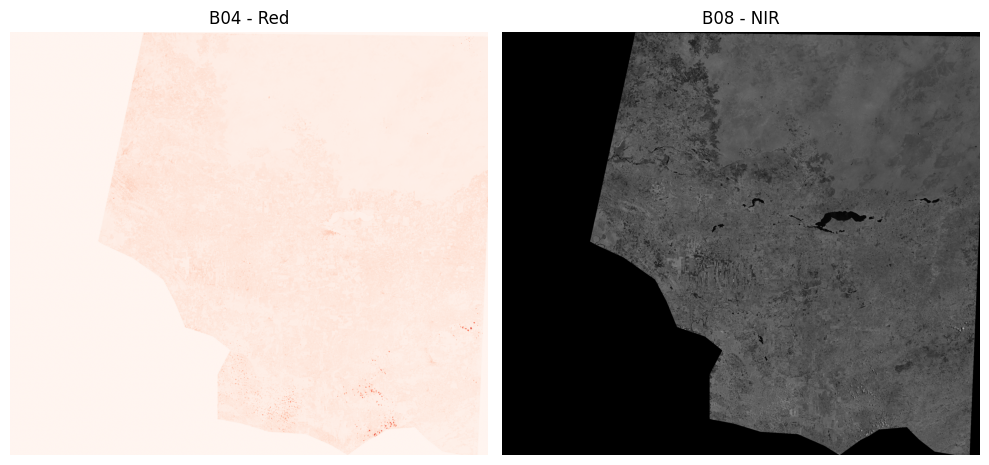

In [93]:
import rasterio
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Paths para los archivos
b4_path = Path("data/2020B04.tiff")
b8_path = Path("data/2020B08.tiff")

# Abrir archivos con Rasterio
with rasterio.open(b4_path) as b4_src:
    b4 = b4_src.read(1)

with rasterio.open(b8_path) as b8_src:
    b8 = b8_src.read(1)

# Plot lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(b4, cmap="Reds")
axes[0].set_title("B04 - Red")
axes[0].axis("off")

axes[1].imshow(b8, cmap="gray")
axes[1].set_title("B08 - NIR")
axes[1].axis("off")

plt.tight_layout()
plt.show()


Utilizando la visualizacion, logramos ver que los archivos fueron cargados correctamente y corresponden a la region del departamento de Peten en Guatemala.

### NDVI
El calculo para NDVI es

NDVI = (NIR − Rojo) / (NIR + Rojo)

In [94]:
ndvi2020 = (b8 - b4) / (b8 + b4)
ndvi2020 = np.clip(ndvi2020, -1, 1)

/tmp/ipykernel_31744/2543768970.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi2020 = (b8 - b4) / (b8 + b4)


## Imagenes del 2024

### Carga y Visualizacion
Podemos cargar los archivos .tiff utilizando la libreria Rasterio

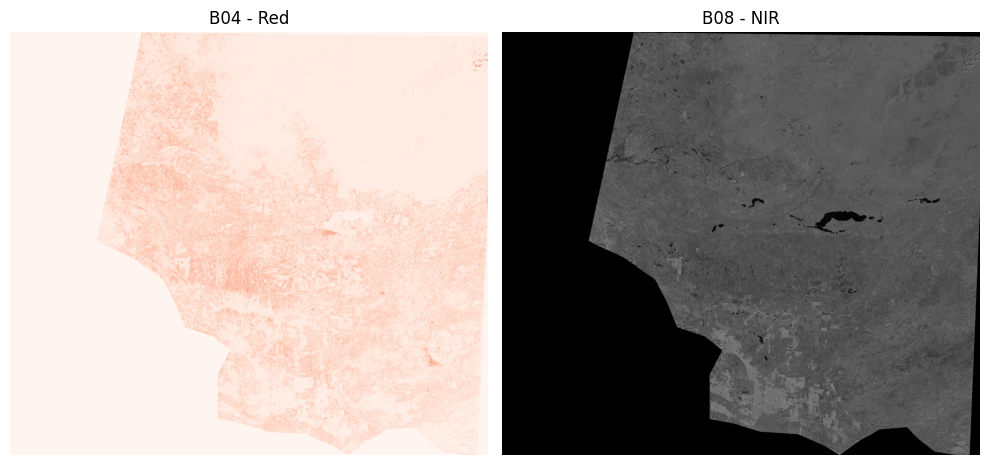

In [95]:
# Paths para los archivos
b4_path = Path("data/2024B04.tiff")
b8_path = Path("data/2024B08.tiff")

# Abrir con Rasterio
with rasterio.open(b4_path) as b4_src:
    b4 = b4_src.read(1)

with rasterio.open(b8_path) as b8_src:
    b8 = b8_src.read(1)

# Plot lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(b4, cmap="Reds")
axes[0].set_title("B04 - Red")
axes[0].axis("off")

axes[1].imshow(b8, cmap="gray")
axes[1].set_title("B08 - NIR")
axes[1].axis("off")

plt.tight_layout()
plt.show()


### NDVI
El calculo para NDVI es

NDVI = (NIR − Rojo) / (NIR + Rojo)

In [96]:
ndvi2024 = (b8 - b4) / (b8 + b4)
ndvi2024 = np.clip(ndvi2024, -1, 1)

/tmp/ipykernel_31744/149181985.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi2024 = (b8 - b4) / (b8 + b4)


## Imagen de Diferencia
Para la imagen de diferencia simplemente podemos restar NDVI de 2024 - NDVI de 2020

In [97]:
ndvi_diff = ndvi2024 - ndvi2020

## Perdida de Vegetacion
Para calcular la perdida de vegetacion, podemos simplemente establecer un treshold para determinar areas que tienen una menor vegetacion en el 2024 en comparacion a 2020

In [98]:
loss_mask = ndvi_diff <= -0.2

# Visualizaciones
En esta seccion estaremos visualizando

- Mapas NDVI lado a lado
- Imagen de diferencia
- Mascara de Deforestacion

## NDVI Lado a Lado
Para graficar el NDVI lado a lado, simplemente utilizamos necesitamos graficar las imagenes que ya cargamos al igual que una leyenda

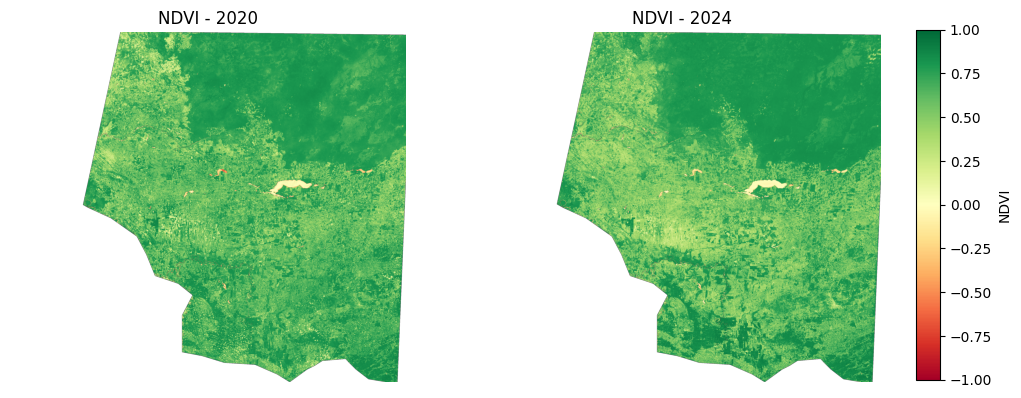

In [99]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

im1 = axes[0].imshow(ndvi2020, cmap="RdYlGn", vmin=-1, vmax=1)
axes[0].set_title("NDVI - 2020")
axes[0].axis("off")

im2 = axes[1].imshow(ndvi2024, cmap="RdYlGn", vmin=-1, vmax=1)
axes[1].set_title("NDVI - 2024")
axes[1].axis("off")

fig.subplots_adjust(right=0.85)

cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im1, cax=cbar_ax)
cbar.set_label("NDVI")

plt.show()

Observando los mapas de NDVI lado a lado, podemos observar algunos patrones interesantes. Lo mas visible inmediatamente, es la perdida de las regiones sumamente densas del lado izquierdo hacia el centro. En el mapa de 2024, toda esta region se encuentra cercano a un NDVI a 0 indicando una cercania a una perdida total de vegetacion. Adicionalmente, algunas de las areas con verdes mas oscuros han empezado a aclararse yendo un poco mas hacia el norte del lado izquierdo. Otra parte interesante es el aumento en vegetacion hacia el norte del lado derecho, donde algunos de los 'parches' anteriormente menos vegetados se encuentran con una vegetacion mas densa en el 2024. Eso nos puede indicar que el norte del departamento esta viendo esfuerzos de deforestacion, mientras que el resto esta viendo una deforestacion 'completa' dejando valores cercanos a 'bare soil'

## NVDI 2024 - 2020
Para graficar la diferencia de vegetacion, simplemente podemos graficar la imagen que hemos calculado

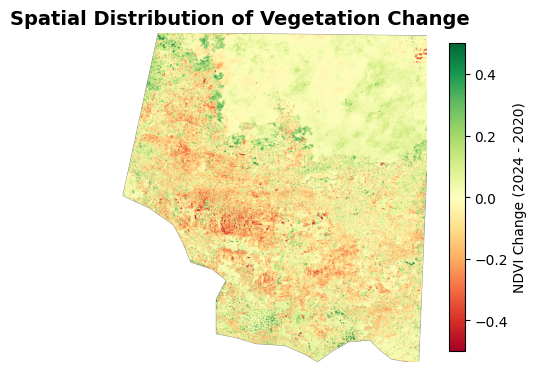

In [100]:
plt.figure(figsize=(6, 5))
plt.imshow(ndvi_diff, cmap='RdYlGn', vmin=-0.5, vmax=0.5)
plt.colorbar(label='NDVI Change (2024 - 2020)', shrink=0.8)
plt.title("Spatial Distribution of Vegetation Change", fontsize=14, fontweight='bold')
plt.axis("off")
plt.show()

Explorando la diferencia de vegetacion, confirmamos algunas de nuestras afirmaciones al ver los mapas de diferencias lado a lado. La parte sur del departamento sufre de un serio problema de deforestacion, teniendo areas con concentraciones altas de indice de perdida de NDVI. Esto nos indica que algunas regiones estan sufriendo de una deforestacion severa, expandiendose hasta el norte del lado izquierdo de la grafica. Esto mientras que algunas partes al norte estan viendo un incremento en vegetacion, en especial las areas densas parecen estarse 'expandiendo' o algunos 'parches' se parecen arreglar. Esto nos confirma que mientras algunos esfuerzos de conservacion se estan haciendo, se estan ignorando las demas areas del departamento donde siguen existiendo estos problemas.

## Mascara de Deforestacion
Para la mascara de deforestacion simplemente podemos graficar la mascara que habiamos calculado anteriormente

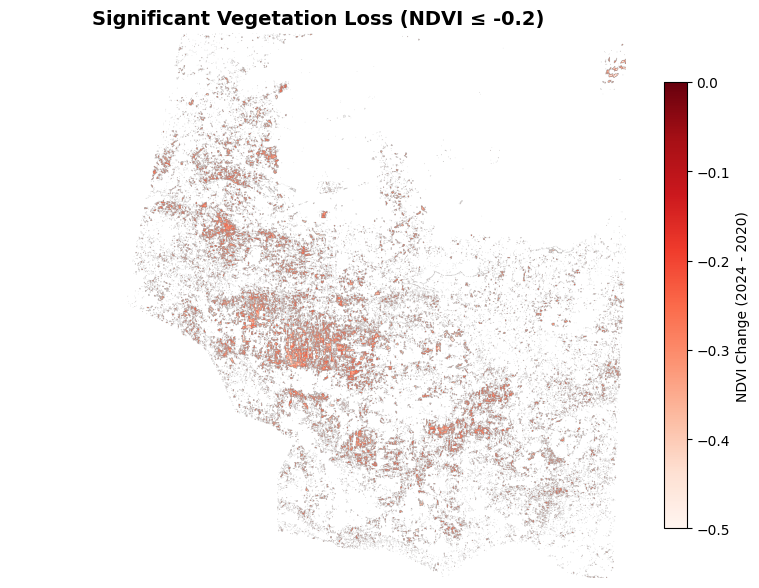

In [ ]:
display_data = np.where(loss_mask, ndvi_diff, np.nan)

plt.figure(figsize=(8, 6))
im = plt.imshow(display_data, cmap='Reds', vmin=-0.5, vmax=0)
plt.colorbar(im, label='NDVI Change (2024 - 2020)', shrink=0.8)
plt.title("Significant Vegetation Loss (NDVI ≤ -0.2)", fontsize=14, fontweight='bold')
plt.axis("off")
plt.tight_layout()
plt.show()

La mascara de deforestacion igualmente confirma lo que habiamos analizado anteriormente. Mientras que la selva al norte del departamento parece no sufrir de deforestacion, el resto del departamento especialmente del lado izquierdo parece estar perdiendo sus selvas rapidamente.

## % de Deforestacion
Para calcular el porcentaje, podemos utilizar el 'loss mask' y calcular la cantidad de pixeles donde encontramos una perdida en vegetacion acorde al treshold

In [102]:
total_pixels = loss_mask.size
loss_pixels = np.count_nonzero(loss_mask)
loss_percentage = (loss_pixels / total_pixels) * 100
print(f"Deforested area: {loss_percentage:.2f}%")

Deforested area: 4.75%


Un total de 4.75% realmente no parece ser mucho, pero tomando en cuenta el contexto al igual que las graficas es un numero bastante alto. Por ejemplo, el 4.75% se calcula sin tomar en cuenta toda el area protegida hacia el norte del departamento. Una buena estadistica seria poder obtener el porcentage de deforestacion FUERA de un area protegida o que esta siendo activamente reforestada.

# Analisis Adicional
Mientras que los resultados se encuentran graficados, podemos intentar ir un poco mas alla y analizar los datos obtenidos en vez de unicamente graficarlos. Buscamos responder algunas de las siguientes preguntas:

- Como se distribuye la vegetacion en 2020 en comparacion a 2024?
- Como se distribuye la perdida de vegetacion entre 2020 y 2024?
- Como se ven diferentes valores del threshold?

## Distribucion de Vegetacion

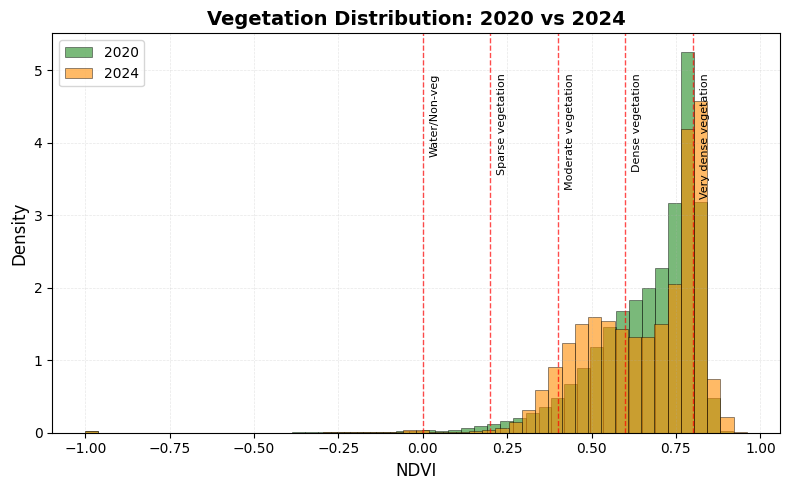

In [ ]:
thresholds = {
    'Water/Non-veg': 0.0,
    'Sparse vegetation': 0.2,
    'Moderate vegetation': 0.4,
    'Dense vegetation': 0.6,
    'Very dense vegetation': 0.8
}

plt.figure(figsize=(8, 5))
plt.hist(ndvi2020.ravel(), bins=50, alpha=0.6, label="2020",
         color='forestgreen', edgecolor='black', linewidth=0.5, density=True)
plt.hist(ndvi2024.ravel(), bins=50, alpha=0.6, label="2024",
         color='darkorange', edgecolor='black', linewidth=0.5, density=True)

for label, threshold in thresholds.items():
    plt.axvline(threshold, color='red', linestyle='--', alpha=0.7, linewidth=1)
    plt.text(threshold + 0.02, plt.ylim()[1] * 0.9, label, 
             rotation=90, fontsize=8, va='top')

plt.xlabel("NDVI", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Vegetation Distribution: 2020 vs 2024", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

Al ver un poco mas a profundidad la distribucion de la vegetacion, podemos ver que en el 2024 hay una concentracion mas alta entre 'sparse' y 'moderate' vegetation. Esto nos indica que algunas de las areas con vegetacion mas densas en el 2020, perdieron su vegetacion. Adicionalmente, en el 2024 existen mas areas con vegetacion muy densa. Esto de cierta manera confirma parte del analisis anterior, algunos esfuerzos de reforestacion se encuentran enfocados en las regiones erroneas. En general, en el 2024 parece estar existiendo un 'shift' hacia areas con vegetacion moderada o vegetacion sumamente densa.

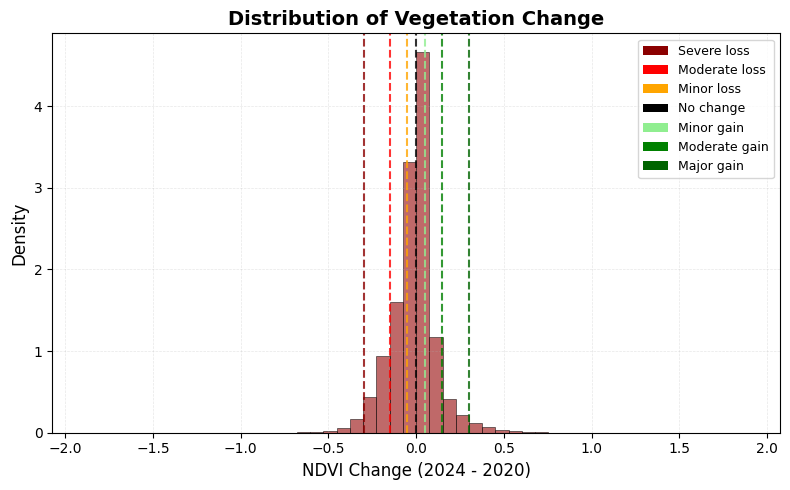

In [ ]:
from matplotlib.patches import Patch

plt.figure(figsize=(8, 5))
plt.hist(ndvi_diff.ravel(), bins=50, color='brown', alpha=0.7, 
         edgecolor='black', linewidth=0.5, density=True)

thresholds = [-0.3, -0.15, -0.05, 0, 0.05, 0.15, 0.3]
labels = ['Severe loss', 'Moderate loss', 'Minor loss', 'No change', 
          'Minor gain', 'Moderate gain', 'Major gain']
colors = ['darkred', 'red', 'orange', 'black', 'lightgreen', 'green', 'darkgreen']

for threshold, color in zip(thresholds, colors):
    plt.axvline(threshold, color=color, linestyle='--', alpha=0.8, linewidth=1.5)

legend_elements = [Patch(facecolor=color, label=label) 
                   for color, label in zip(colors, labels)]
plt.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.xlabel("NDVI Change (2024 - 2020)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Vegetation Change", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

En esta grafica podemos ver la distribucion de los cambios en vegetacion, en este caso la grafica tiene una mayor agrupacion de datos hacia el lado izquierdo. Esto se alinea con la informacion analizada anteriormente, indicando una 'perdida general' de vegetacion en el 2024 en comparacion al 2020. Existen muchas areas con cambios ligeros en la vegeracion (como minor gain o minor loss), pero logramos ver que del lado izquierdo las perdidas mas alla de las menores son significativamente mas frecuentes en comparacion al lado derecho.

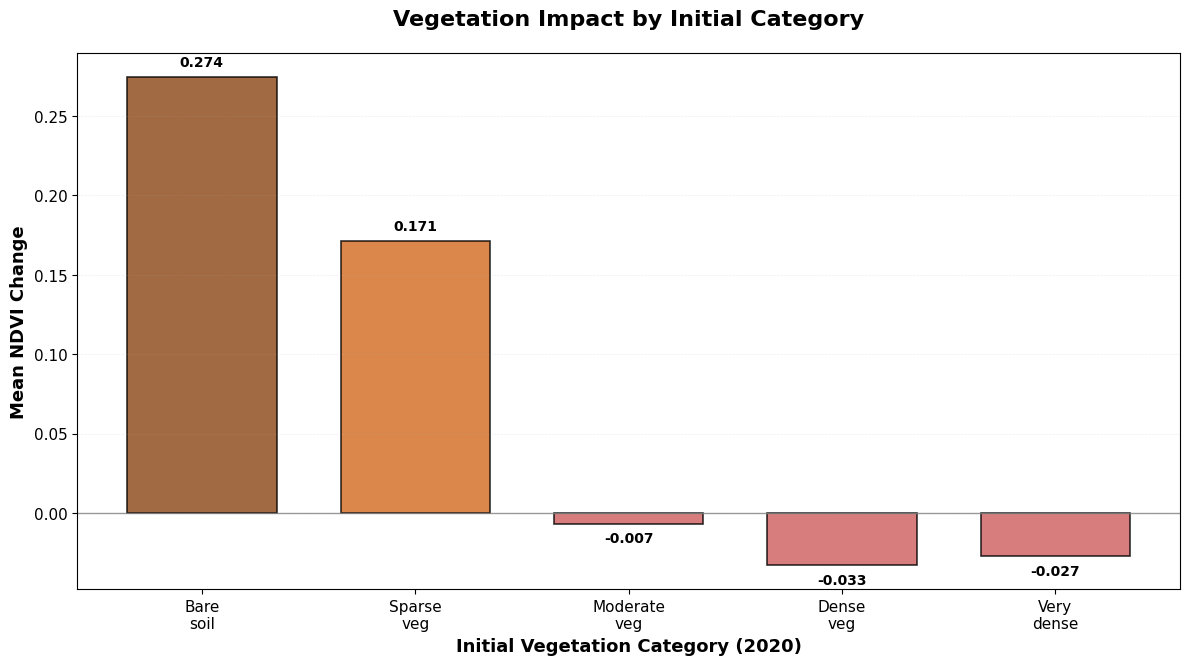

In [ ]:
def categorize_ndvi(ndvi):
    return np.select([
        ndvi < 0, 
        (ndvi >= 0) & (ndvi < 0.2),
        (ndvi >= 0.2) & (ndvi < 0.4),
        (ndvi >= 0.4) & (ndvi < 0.6),
        (ndvi >= 0.6) & (ndvi < 0.8),
        ndvi >= 0.8
    ], [0, 1, 2, 3, 4, 5], default=0)

categories = ['Water/\nNon-veg', 'Bare\nsoil', 'Sparse\nveg', 'Moderate\nveg', 'Dense\nveg', 'Very\ndense']

cat_2020 = categorize_ndvi(ndvi2020)

mean_changes = []
for i in range(6):
    mask = cat_2020 == i
    if np.any(mask):
        mean_change = np.mean(ndvi_diff[mask])
        mean_changes.append(mean_change)
    else:
        mean_changes.append(0)

plt.figure(figsize=(12, 7))

base_colors = ['#2E86C1', '#8B4513', '#D2691E', '#228B22', '#006400', '#013220']
final_colors = []
for i, (base_color, change) in enumerate(zip(base_colors, mean_changes)):
    if change < 0:
        final_colors.append('#CD5C5C')
    else:
        final_colors.append(base_color)

bars = plt.bar(categories, mean_changes, color=final_colors, alpha=0.8, 
               edgecolor='black', linewidth=1.2, width=0.7)

plt.axhline(0, color='gray', linestyle='-', alpha=0.8, linewidth=1)

plt.xlabel("Initial Vegetation Category (2020)", fontsize=13, fontweight='bold')
plt.ylabel("Mean NDVI Change", fontsize=13, fontweight='bold')
plt.title("Vegetation Impact by Initial Category", fontsize=16, fontweight='bold', pad=20)

plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

plt.grid(alpha=0.2, linestyle="--", linewidth=0.5, axis='y')

for bar, value in zip(bars, mean_changes):
    height = bar.get_height()
    offset = 0.005 if height >= 0 else -0.005
    plt.text(bar.get_x() + bar.get_width()/2., height + offset,
             f'{value:.3f}', ha='center', 
             va='bottom' if height >= 0 else 'top',
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

En esta grafica podemos identificar las categorias (segun NDVI) mas afectadas por los cambios en vegetacion. Podemos ver que las areas con vegetacion existente normalmente tienen perdidas generales, mientras que las areas con vegetacion esparsa o nada de vegetacion suelen ver incrementos. Esto nos sugiere que nuestro analisis anterior es correcto, y generalmente se deberia de intentar prevenir la deforestacion en lugar de enfocarse en la reforestacion.

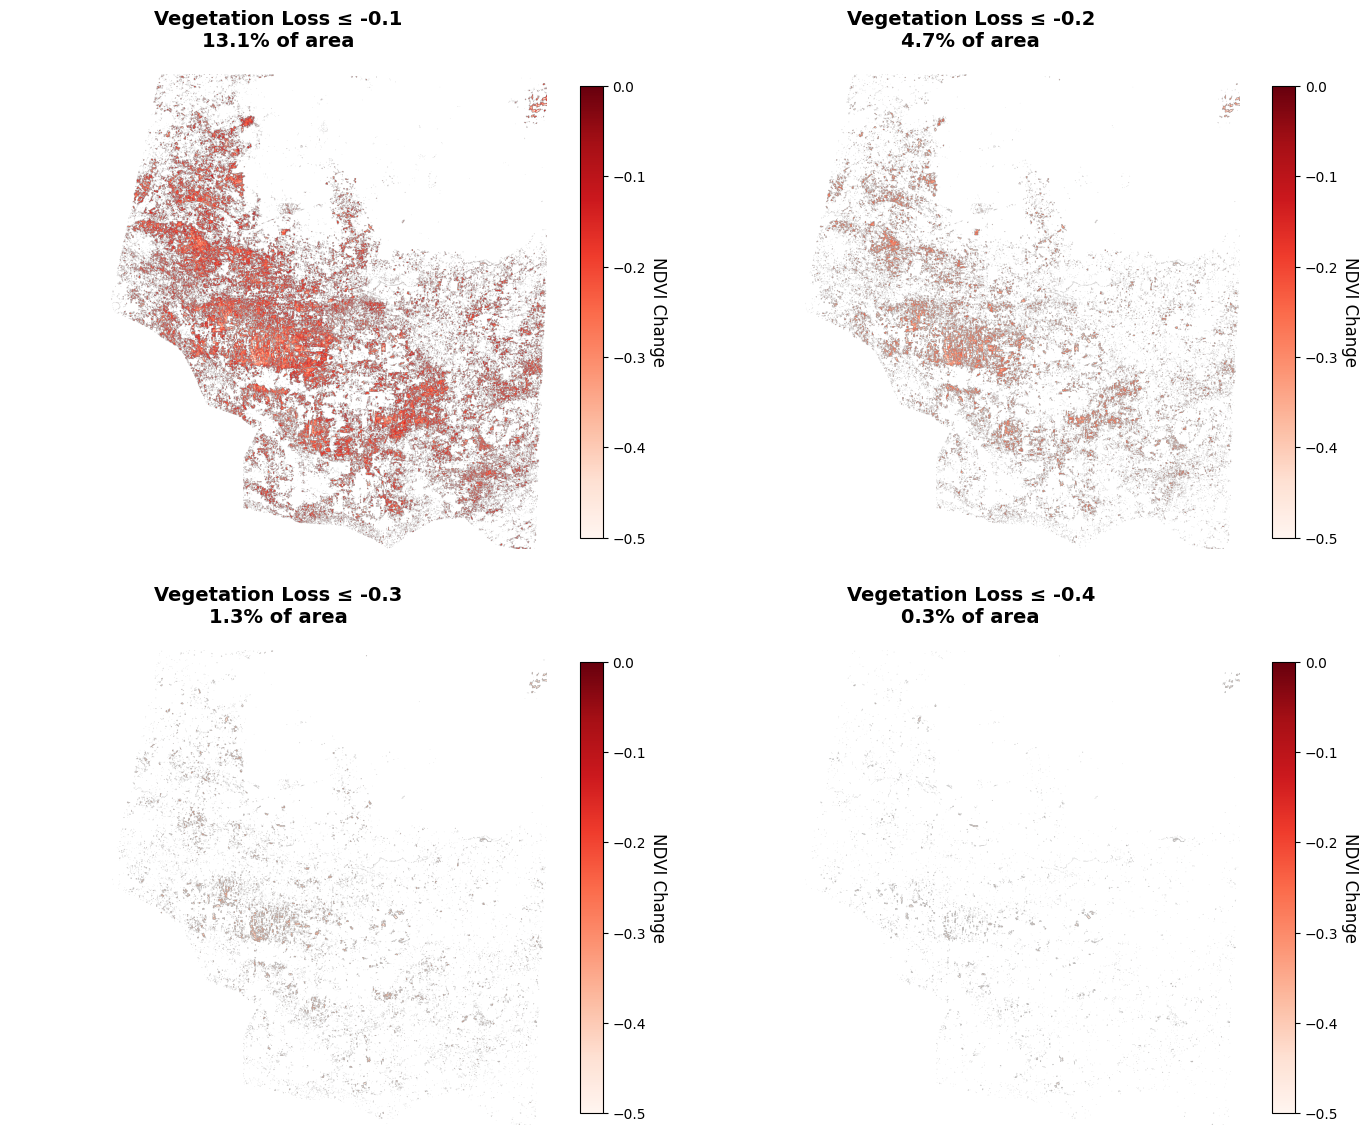

In [ ]:
thresholds = [-0.1, -0.2, -0.3, -0.4]
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for i, (ax, t) in enumerate(zip(axes, thresholds)):
    loss_mask = ndvi_diff <= t
    
    total_pixels = ndvi_diff.size
    loss_pixels = np.sum(loss_mask)
    loss_percentage = (loss_pixels / total_pixels) * 100
    
    display_data = np.where(loss_mask, ndvi_diff, np.nan)
    
    im = ax.imshow(display_data, cmap='Reds', vmin=-0.5, vmax=0)
    
    ax.set_title(f'Vegetation Loss ≤ {t}\n{loss_percentage:.1f}% of area', 
                fontsize=14, fontweight='bold', pad=20)
    ax.axis("off")
    
    cbar = plt.colorbar(im, ax=ax, shrink=0.8)
    cbar.set_label('NDVI Change', rotation=270, labelpad=15, fontsize=12)

plt.tight_layout()
plt.show()

Utilizando estos mapas, podemos identificar mas facilmente las areas afectadas por la perdida de vegetacion en el 2024 en comparacion al 2020. Si aumentamos el threshold, el area aumenta a alrededor de un 13%. Esto nos indica que las perdidas realmente afectan a un porcentaje mas alto del departamento, dependiendo que tan severas sean. Adicionalmente, al disminuir el treshold se obtiene un porcentaje de 1.3%. Al observar los mapas, podemos ver que raelmente no hay areas 'extremadamente concentradas', si no que en general toda el area que se puede observar en los thresholds bajos tiene algunos puntos especificos con perdidas grandes.

# Conclusiones

- Existe una perdida de vegetacion en el departamento de Peten entre el 2020 y 2024
- Las areas protegidas ven un incremento en indice de vegetacion (por ejemplo, la selva al norte), mientras que el resto del departamento sufre de deforestacion
- Las areas con vegetacion densa se han empezado a volver areas con vegetacion moderada o baja
- La deforestacion no tiene 'hotspots', donde las perdidas son grandes en areas especificas. En su lugar, existen areas distribuidas a lo largo del departamento que sufren de deforestacion y a lo largo de estas areas se encuentran las perdidas mas grandes.
- Las areas con baja vegetacion vieron ganancias en vegetacion, mientras que las areas con vegetaciones mas densas vieron perdidas
- Recomendamos que los esfuerzos ecologicos se enfoquen en prevenir la deforestacion, en lugar de enfocarse en la reforestacion. En este caso, se puede ver como los esfuerzos actuales tienen frutos pero no atacan el 'problema mas grande'.

# Recomendaciones
- Utilizar mas puntos de diferencia para poder llevar a cabo visualizaciones mas precisas
- Utilizar identificadores regionales como departamentos o municipios
- Apoyar el analisis de NDVI con algunas otras metricas
- Consultar con expertos en el area para identificar las causas especificas de lo observado